##### Import the libraries

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.models import Sequential
from keras.utils import plot_model, to_categorical
from keras.datasets import cifar10

##### Load the dataset

In [5]:
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

In [6]:
x_train.shape

(50000, 32, 32, 3)

In [8]:
x_test.shape

(10000, 32, 32, 3)

In [9]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [10]:
y_train.shape

(50000, 1)

In [11]:
labels = ['airplane','automobile','bird','cat','deer','dog',
          'frog','horse','ship','truck']

##### Explore the images

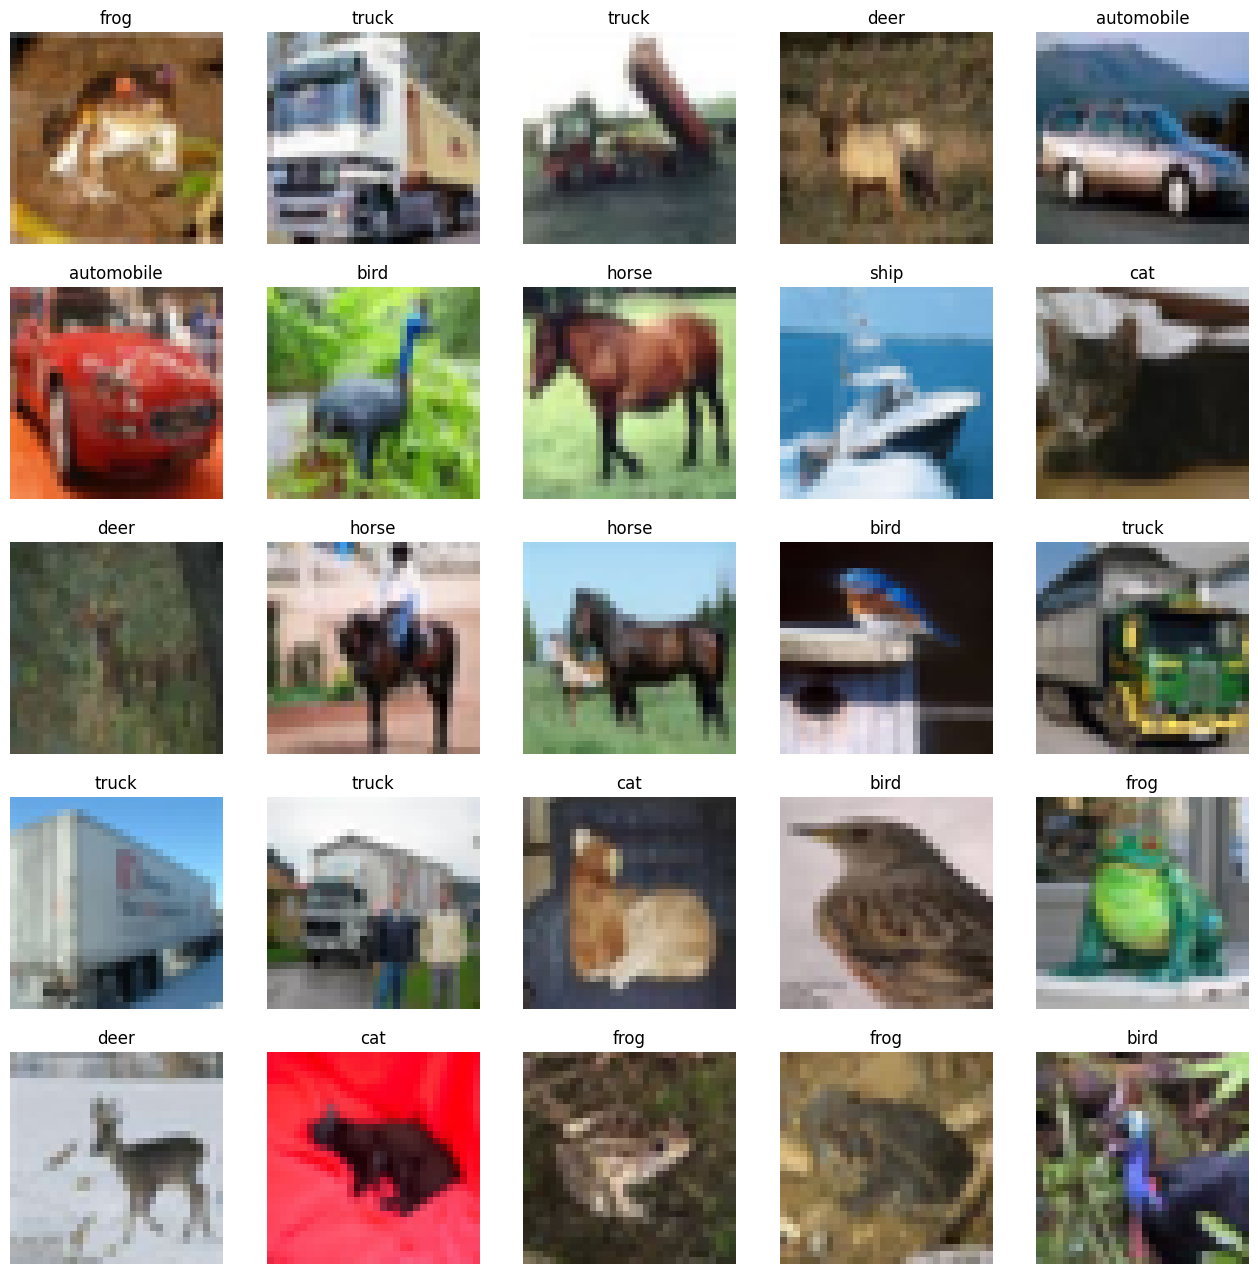

In [18]:
plt.figure(figsize=(16,16))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.axis('off')
    plt.imshow(x_train[i])
    plt.title(labels[y_train[i][0]])

##### Scale the data

In [20]:
x_train = x_train / 255
x_test  = x_test / 255

##### Build the model

In [25]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(32,32,3),
                activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 16)        4624      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 16)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 576)              

##### Compile the model

In [28]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',
             metrics=['accuracy'])

##### Train the model

In [31]:
model.fit(x_train, y_train, epochs=10, batch_size=10)

Epoch 1/10
5000/5000 [==============================] - 27s 5ms/step - loss: 1.0708 - accuracy: 0.6246
Epoch 2/10
5000/5000 [==============================] - 27s 5ms/step - loss: 0.9557 - accuracy: 0.6649
Epoch 3/10
5000/5000 [==============================] - 27s 5ms/step - loss: 0.8658 - accuracy: 0.6948
Epoch 4/10
5000/5000 [==============================] - 26s 5ms/step - loss: 0.7969 - accuracy: 0.7181
Epoch 5/10
5000/5000 [==============================] - 27s 5ms/step - loss: 0.7380 - accuracy: 0.7401
Epoch 6/10
5000/5000 [==============================] - 26s 5ms/step - loss: 0.6820 - accuracy: 0.7573
Epoch 7/10
5000/5000 [==============================] - 27s 5ms/step - loss: 0.6415 - accuracy: 0.7721
Epoch 8/10
5000/5000 [==============================] - 27s 5ms/step - loss: 0.5989 - accuracy: 0.7866
Epoch 9/10
5000/5000 [==============================] - 27s 5ms/step - loss: 0.5642 - accuracy: 0.7989
Epoch 10/10
5000/5000 [==============================] - 27s 5ms/step - l

##### Evaluate on test data

In [33]:
model.evaluate(x_test, y_test, batch_size=1)

10000/10000 [==============================] - 15s 1ms/step - loss: 1.1379 - accuracy: 0.6721


[1.1379352807998657, 0.6721000075340271]

In [38]:
import cv2
img = cv2.imread('myimage.webp')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (32,32))
img = img / 255

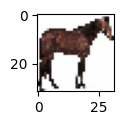

In [39]:
plt.figure(figsize=(1,1))
plt.imshow(img)

In [43]:
img = img.reshape(1,32,32,3)
labels[model.predict(img).argmax()]

1/1 [==============================] - 0s 18ms/step


'horse'